In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.drop(columns=["Unnamed: 0","Booking_ID"], inplace=True)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(21359, 18)

In [14]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space','room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [18]:
data = df.copy()

In [22]:
def plot_bivariate(df, target,num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2,figsize=(15,num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, data=df, ax=axes[i],palette="Blues")
        axes[i].set_title(f"{col} vs {target}")
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)
    plt.tight_layout()
    plt.show()

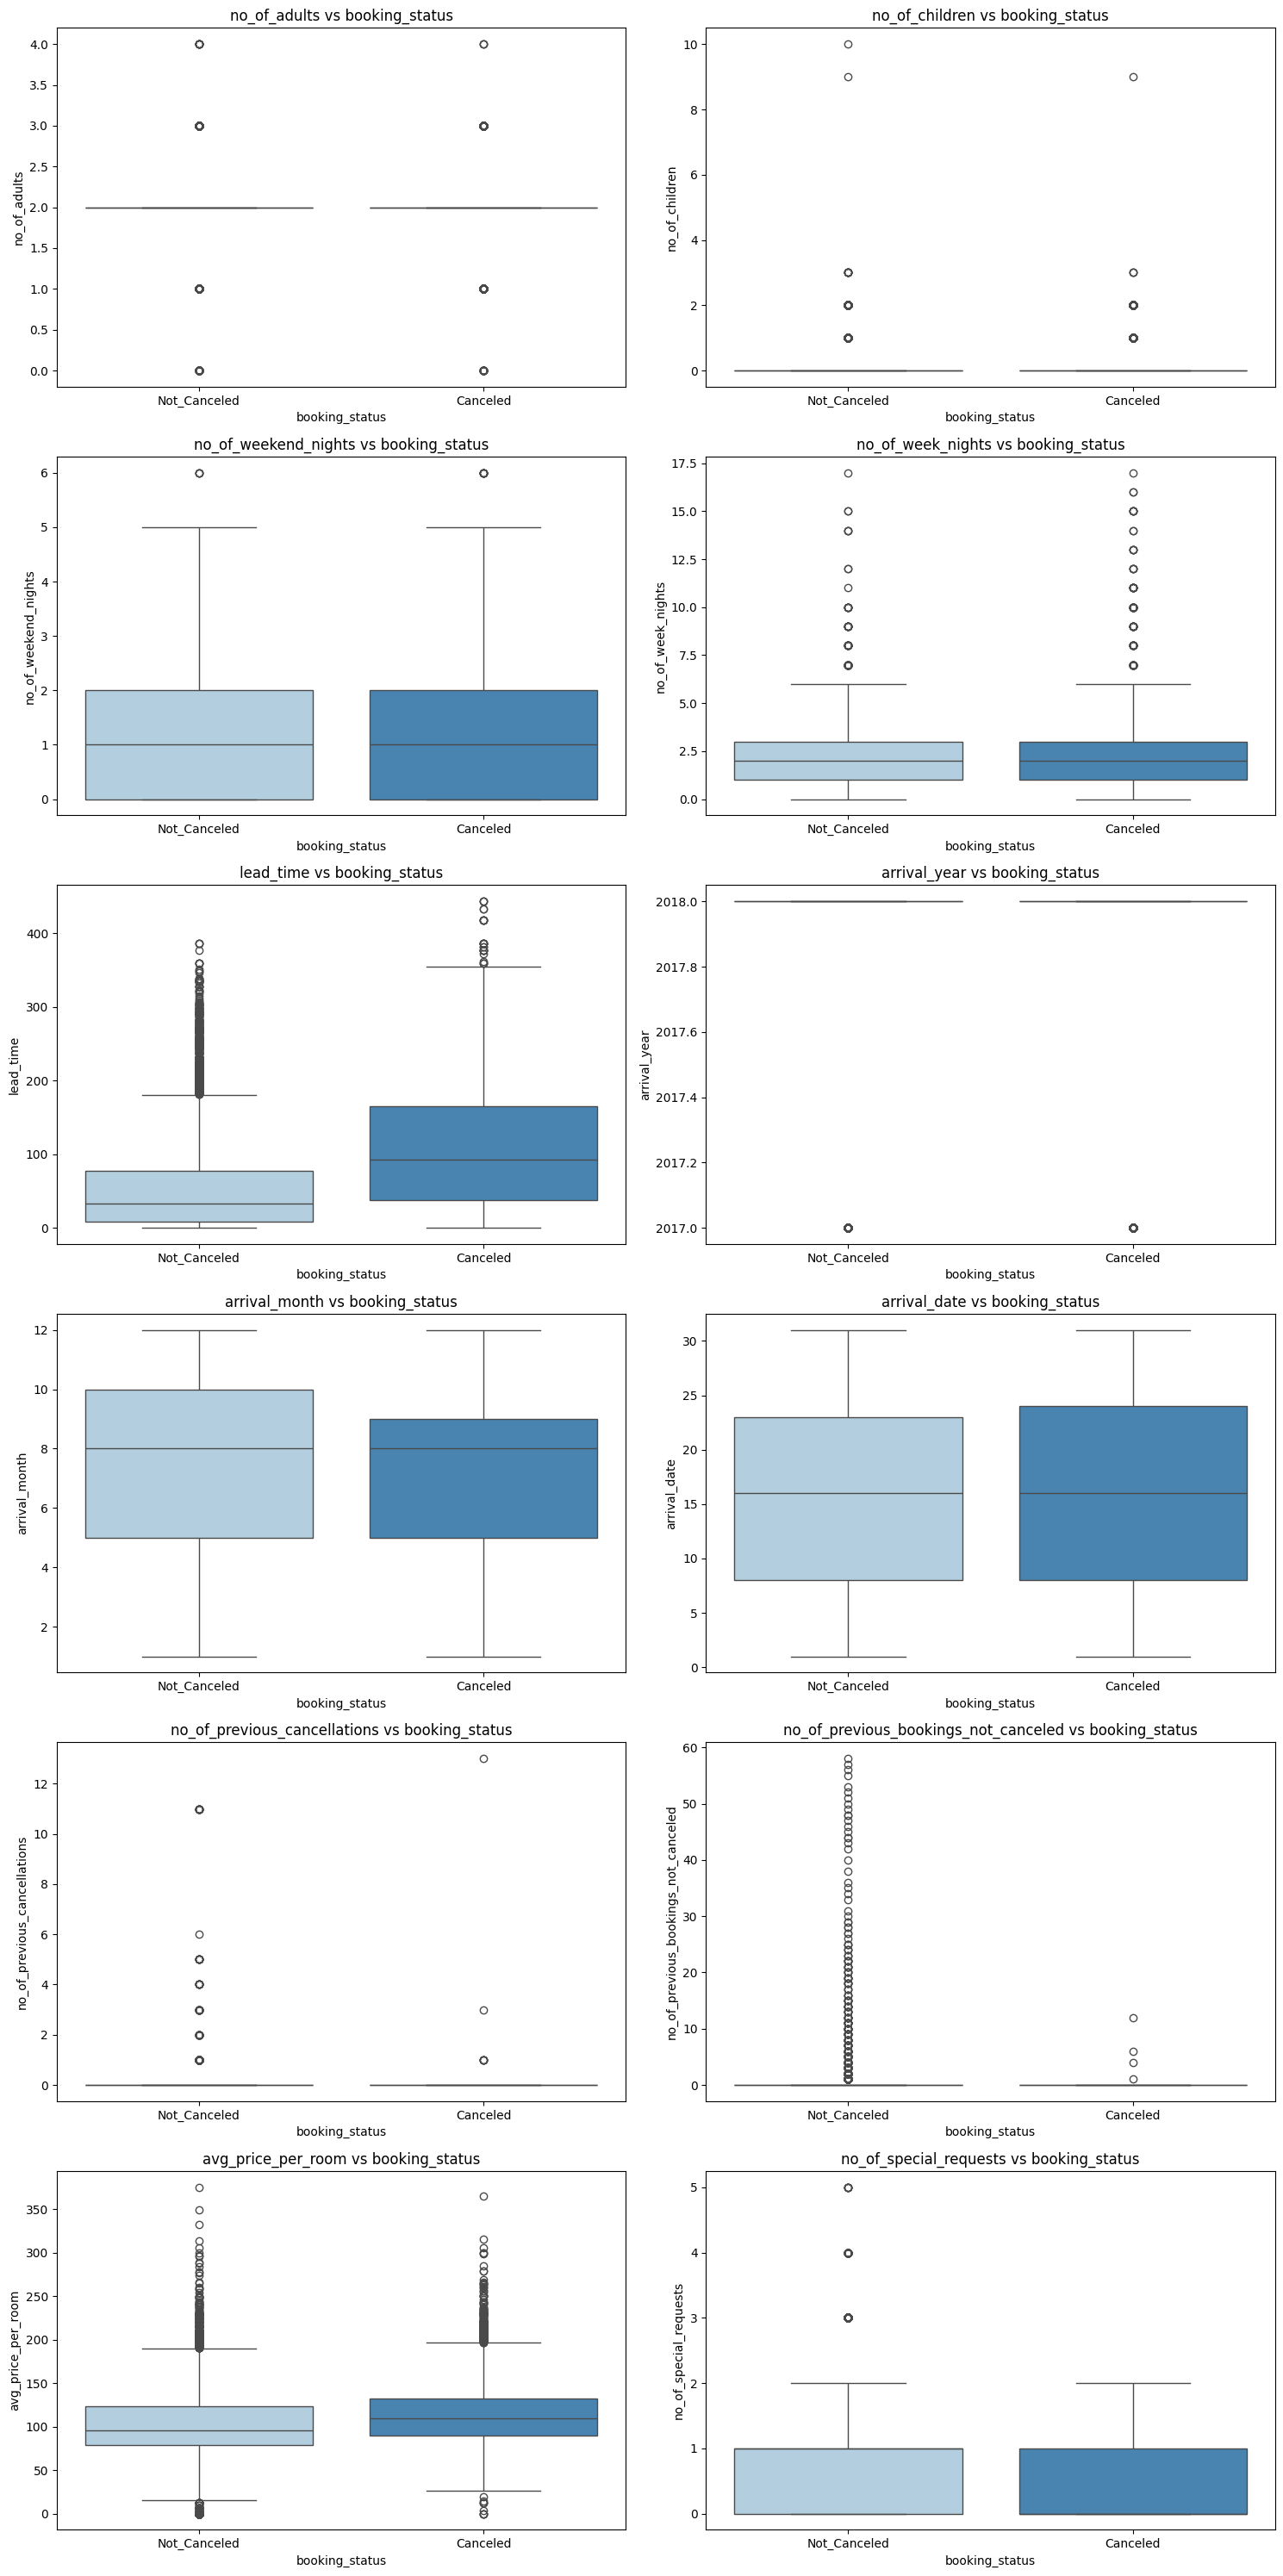

In [23]:
plot_bivariate(data, "booking_status", num_cols)

In [29]:
from sklearn.preprocessing import LabelEncoder

mapping = {}
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
     


In [30]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [31]:
%pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 3.5 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 3.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 3.5 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 3.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:
x = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [35]:
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [36]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [37]:
corr = df.corr()

In [38]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

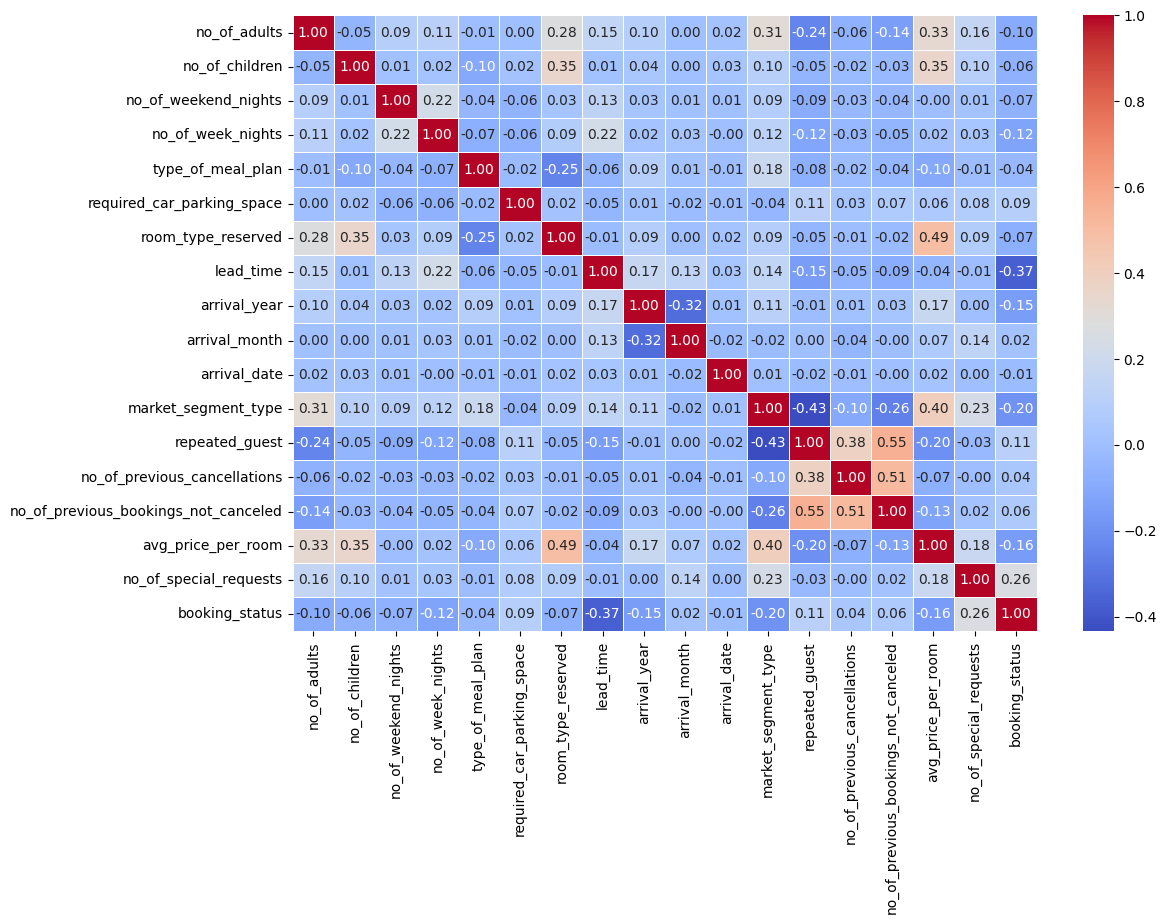

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [44]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           3.029609
no_of_weekend_nights                     0.088633
no_of_week_nights                       -0.375219
type_of_meal_plan                        1.555100
required_car_parking_space               4.538315
room_type_reserved                       1.112290
lead_time                               -0.748187
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -3.617649
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                      -4.962253
no_of_special_requests                   0.298868
booking_status                          -0.942305
dtype: float64

In [42]:
for col in df.columns:
    if abs(skewness[col]) > 0.5:
        df[col] = np.log1p(df[col])
        # print(f"Applied log transformation to {col}")

In [49]:
x = data.drop(columns="booking_status")   
y = data["booking_status"]

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [51]:
pd.Series(y_resampled).value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [52]:
balanced_data = pd.DataFrame(x_resampled, columns=x.columns)
balanced_data["booking_status"] = y_resampled
balanced_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [53]:
balanced_data.shape

(30462, 18)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
x = balanced_data.drop(columns=["booking_status"])
y = balanced_data["booking_status"]
rf = RandomForestClassifier(random_state=42)

In [58]:
feature_importances = rf.fit(x, y).feature_importances_

In [59]:
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

In [62]:
feature_importance

,feature,importance
7,lead_time,0.261304
16,no_of_special_requests,0.185232
15,avg_price_per_room,0.148506
9,arrival_month,0.087247
10,arrival_date,0.084334
11,market_segment_type,0.057016
3,no_of_week_nights,0.045117
2,no_of_weekend_nights,0.030075
4,type_of_meal_plan,0.020199
6,room_type_reserved,0.019264


In [61]:
Top_features = feature_importance["feature"].head(10).tolist()

Top_features_df =  balanced_data[Top_features + ["booking_status"]]
Top_features_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [63]:
%pip install xgboost lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 2.9 MB/s eta 0:00:52
   ---------------------------------------- 1.6/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.8/150.0 MB 2.6 MB/s eta 0:00:58
    --------------------------------------- 2.9/150.0 MB 2.8 MB/s eta 0:00:53
    --------------------------------------- 3.4/150.0 MB 2.7 MB/s eta 0:00:54
    --------------------------------------- 3.7/150.0 MB 2.6 MB/s eta 0:00:56
   - -------------------------------------- 4.2/150.0 MB 2.6 MB/s eta 0:00:57
   - -------------------------------------- 5.2/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 5.8/150.0 MB 2.9 MB/s eta 0:00:51
   - -------------------------------------- 6.8/150.0 MB 3.0 MB/s eta 0:00:48
   -- --


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
X = Top_features_df.drop(columns=["booking_status"])
y = Top_features_df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LGBMClassifier": LGBMClassifier(random_state=42)
}

In [68]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [69]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    f1_score = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1_score)
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False)
print(metrics_df)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857
[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [b

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [71]:
X = Top_features_df.drop(columns=["booking_status"])
y = Top_features_df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False]
}

In [73]:
random_Search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=5, cv=5, verbose=1, random_state=42,scoring="accuracy"
)

In [74]:
random_Search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022271DFB750>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002220A4027B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002220A3FB360>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002225D2F8550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002220A402660>},
                   random_state=42, scoring='accuracy', verbose=1)

In [75]:
best_params = random_Search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': 17, 'max_features': np.float64(0.48875051677790415), 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 108}


In [76]:
best_model = random_Search.best_estimator_
y_pred = best_model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
f1_score = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.8889
Precision: 0.8881
Recall: 0.8919
F1-Score: 0.8900


In [78]:
import joblib

In [79]:
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [80]:
loaded_model = joblib.load('best_random_forest_model.pkl')

In [81]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0
